### Read in corpus of data and create list of intervals

In [1]:
from music21 import *
import matplotlib.pyplot as plt
import numpy as np

Bach = corpus.search('Verdi', 'Composer')
intrvlist = []
cnt = 0
for thisPiece in Bach:
    print('{} of {} total pieces'.format(cnt, len(Bach)))
    thisScore = thisPiece.parse()
    for thisPart in thisScore.parts:
        testNotes = thisPart.flat.getElementsByClass('Note')
        for n1, n2 in zip(testNotes[:-1], testNotes[1:]):
            intrvlist.append(interval.Interval(n1,n2).semitones)

    cnt += 1

plt.hist(intrvlist, bins=np.arange(-19,21)-.5)
plt.show()

0 of 53 total pieces
1 of 53 total pieces
2 of 53 total pieces
3 of 53 total pieces
4 of 53 total pieces
5 of 53 total pieces
6 of 53 total pieces
7 of 53 total pieces
8 of 53 total pieces
9 of 53 total pieces
10 of 53 total pieces
11 of 53 total pieces
12 of 53 total pieces
13 of 53 total pieces
14 of 53 total pieces
15 of 53 total pieces
16 of 53 total pieces
17 of 53 total pieces
18 of 53 total pieces
19 of 53 total pieces
20 of 53 total pieces
21 of 53 total pieces
22 of 53 total pieces
23 of 53 total pieces
24 of 53 total pieces
25 of 53 total pieces
26 of 53 total pieces
27 of 53 total pieces
28 of 53 total pieces
29 of 53 total pieces
30 of 53 total pieces
31 of 53 total pieces
32 of 53 total pieces
33 of 53 total pieces
34 of 53 total pieces
35 of 53 total pieces
36 of 53 total pieces
37 of 53 total pieces
38 of 53 total pieces
39 of 53 total pieces
40 of 53 total pieces
41 of 53 total pieces
42 of 53 total pieces
43 of 53 total pieces
44 of 53 total pieces
45 of 53 total piece

<Figure size 640x480 with 1 Axes>

### define a recursive pattern search function to search for strings of intervals in the list

In [2]:
def patternsearch(seq, pat, indices=None):
    if indices is None:
        indices = np.arange(len(seq))
    found = (seq == pat[0]).nonzero()[0]
    inind = np.in1d(found, indices)
    if len(pat) == 1:
        return found[inind]
    elif np.any(inind):
        return patternsearch(seq, pat[1:], indices=found[inind]+1)
    else:
        return []

### Create melodies based on the interval counts

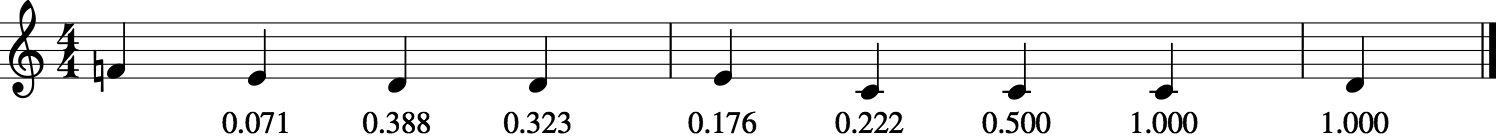

In [5]:
from scipy.stats import mode
intrvBach = np.array(intrvlist)

# create the number of interval
intrvNum = 9
intrvPtrn = []
# # use this function to get the MOST common melody
# func = lambda x: mode(x)[0][0]
# use this function to get a random melody in Bach Style
func = np.random.choice
# get an inteval pattern
intrvDist = np.array(intrvlist)
# turn the interval list into melodies
melody = stream.Stream()
nextNote = note.Note(np.random.randint(57,69))
intsprobs = []
for iN in range(intrvNum):

    melody.append(nextNote)
    # choose next interval
    nextIntrv = func(intrvDist)
    # save it and record the probability
    intrvPtrn.append(nextIntrv)
    intrvprob = np.sum(intrvDist == nextIntrv)/len(intrvDist)
    intsprobs.append(intrvprob)
    # create the next note based on interval
    nextNote = nextNote.transpose(nextIntrv)
    nextNote.lyric = '{:1.3f}'.format(intrvprob)
    
    # Identify all the locations of the new updated pattern
    eop = patternsearch(intrvBach, intrvPtrn)
    # remove any pattern that has reached the end
    eop = eop[eop != len(intrvBach)-1]
    # generate new distribution for the following note
    intrvDist = intrvBach[eop+1]

melody.show()

In [ ]:
melody.show('musicxml')

In [ ]:
n,x = np.histogram(intrvlist, bins=np.arange(-19,21)-.5)
plt.figure()
plt.bar(x[:-1]+.5,n/np.sum(n))
plt.show()